In [ ]:
# This analysis is heavily inspired by research from Simplilearn:
# https://www.simplilearn.com/tutorials/data-analytics-tutorial/spotify-data-analysis-project

In [35]:
# Import these libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Import the data

df_tracks = pd.read_csv('spotify_songs.csv')
df_tracks.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14/06/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13/12/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05/07/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19/07/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05/03/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [7]:
# null values

pd.isnull(df_tracks).sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [14]:
# Look at how much missing data there is

df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [13]:
# Find out the top 10 most popular tracks

sorted_df = df_tracks.sort_values('track_popularity', ascending = False).head(10)
sorted_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,17/10/2019,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,17/10/2019,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10/10/2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10/10/2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10/10/2019,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10/10/2019,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
30209,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,06/09/2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280
19715,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,29/11/2019,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
19740,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,06/09/2019,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280
20252,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,07/11/2019,Urbano: Latino Vibes,0VsVywryrqLhHmsVFVcOAg,latin,...,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960


In [17]:
# Find out some descripstive statistics of the dataset

df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [19]:
# Look at top 10 most popular songs in the dataset

most_popular = df_tracks.query('track_popularity>90', inplace = False).sort_values('track_popularity', ascending = False)
most_popular[:10]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,17/10/2019,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,17/10/2019,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10/10/2019,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10/10/2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10/10/2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10/10/2019,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
18756,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,07/11/2019,Baila Reggaeton,37i9dQZF1DWY7IeIP1cdjF,latin,...,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,06/12/2019,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653
23103,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,07/11/2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960
18330,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,06/09/2019,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280


In [22]:
# Index the data by release date

df_tracks.set_index("track_album_release_date", inplace=True)
df_tracks.index=pd.to_datetime(df_tracks.index)
df_tracks.head()

KeyError: "None of ['track_album_release_date'] are in the columns"

In [23]:
# find the 18th artist in the dataset
df_tracks[["track_artist"]].iloc[18]

track_artist    Sam Smith
Name: 2019-08-03 00:00:00, dtype: object

In [24]:
# Convert songs from ms to s
df_tracks["duration"]= df_tracks["duration_ms"].apply(lambda x: round(x/1000))
df_tracks.drop("duration_ms", inplace=True, axis=1)

In [27]:
df_tracks.duration.head()

track_album_release_date
2019-06-14    195
2019-12-13    163
2019-05-07    177
2019-07-19    169
2019-05-03    189
Name: duration, dtype: int64

[Text(0.5, 0, 'track_popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'duration')]

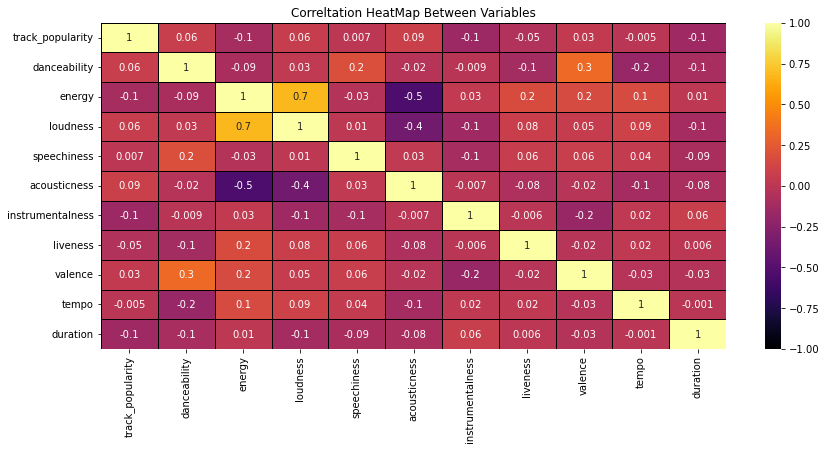

In [33]:
# Create a correlation heatmap between the variables

corr_df=df_tracks.drop(["key","mode"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correltation HeatMap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [34]:
# Heatmap above shows a number of potential relationships between variables:
# + Energy and loudness have a strong positive correlation (0.7), suggesting that high energy songs are generally also loud
# + valience and danceability have a relatively strong correlation coefficient, suggesting that dancier songs are usually more positive or happy
# - Energy and Acousticness have a strong negative correlation (-0.5), suggesting that highly acoustic songs have less energy
# - same applies to Loudness and Acousticness (0.4)


In [37]:
# Create a sample data frame
sample_df = df_tracks.sample(int(0.004*len(df_tracks)))

In [38]:
print(len(sample_df))

131


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

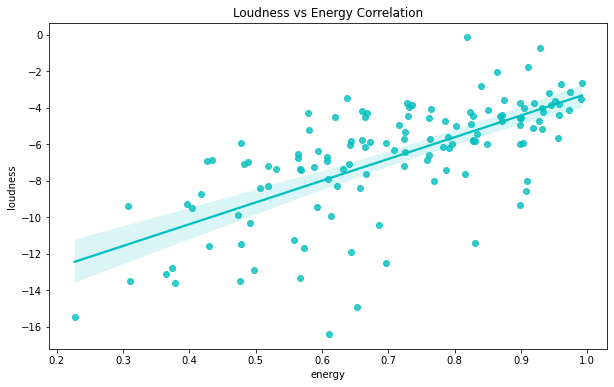

In [39]:
# Create a regression plot for Loudness and Energy

plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y = "loudness", x = "energy", color = "c").set(title = "Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

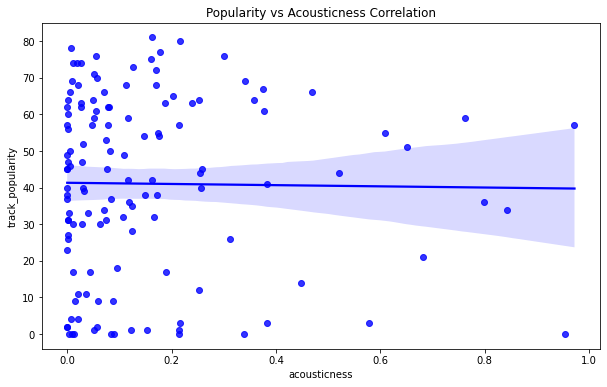

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y = "track_popularity", x = "acousticness", color = "b").set(title = "Popularity vs Acousticness Correlation")

In [41]:
df_tracks['dates']=df_tracks.index.get_level_values('track_album_release_date')
df_tracks.dates=pd.to_datetime(df_tracks.dates)
years=df_tracks.dates.dt.year

In [42]:
pip install --user seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.


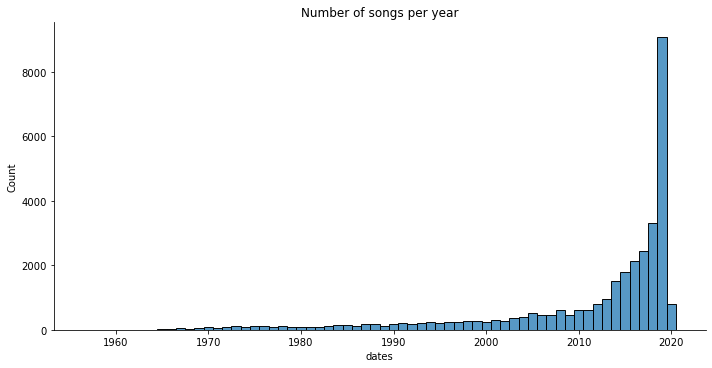

In [44]:
# Create histogram to see the variation of release dates of songs in the dataset

sns.displot(years,discrete=True,aspect=2,height=5 ,kind="hist").set(title="Number of songs per year")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 [Text(0, 0, '1957'),
  Text(1, 0, '1958'),
  Text(2, 0, '1960'),
  Text(3, 0, '1961'),
  Text(4, 0, '1962'),
  Text(5, 0, '1963'),
  Text(6, 0, '1964'),
  Text(7, 0, '1965'),
  Text(8, 0, '1966'),
  Text(9, 0, '1967'),
  Text(10, 0, '1968'),
  Text(11, 0, '1969'),
  Text(12, 0, '1970'),
  Text(13, 0, '1971'),
  Text(14, 0, '1972'),
  Text(15, 0, '1973'),
  Text(16, 0, '1974'),
  Text(17, 0, '1975'),
  Text(18, 0, '1976'),
  Text(19, 0, '1977'),
  Text(20, 0, '1978'),
  Text(21, 0, '1979'),
  Text(22, 0, '1980'),
  Text(23, 0, '1981'),
  Text(24, 0, '1982'),
  Text(25, 0, '1983'),
  Text(26, 0, '1984'),
  Text(27, 0, '1985'),
  Text(28, 0, '1986'),
  Text(29, 0, '1987'),
  Text(30, 0, '1988'),
  Text(31, 

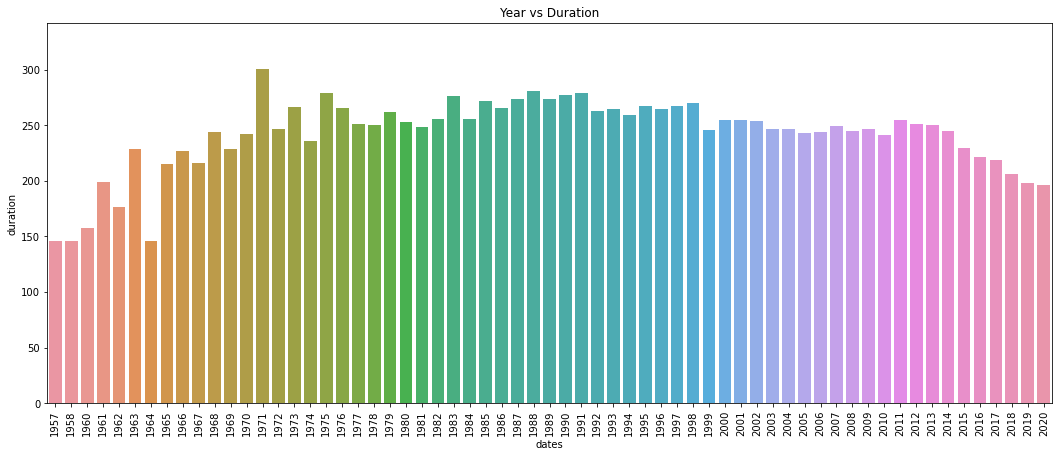

In [47]:
total_dr = df_tracks.duration
fig_dims = (18,7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x = years, y = total_dr, ax = ax, errwidth = False).set(title="Year vs Duration")
plt.xticks(rotation=90)

In [ ]:
total_dr=df_tracks.duration
sns.set_style(style="whitegrid")
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=years, y=total_dr,ax=ax).set(title="Year vs Duration")
plt.xticks(rotation=60)

In [ ]:
plt.title("Duration of songs in different genres")
sns.color_paletter("rocket", as_cmap= True)
sns.barplot(y='playlist_genre', x='duration_ms', data=df_tracks)
plt.xlabel("Duration in milliseconds")
plt.ylabel("Genres")